In [8]:
from arcgis import *
from arcgis.mapping import MapImageLayer
from arcgis.features import SpatialDataFrame
import pandas as pd
from pandas import DataFrame, Series, Index
import numpy as np

In [9]:
gis = GIS("https://deldev.maps.arcgis.com", "demo_deldev", "DelDevs12")

In [10]:
!pwd

/home/ubuntu/brick_kilns


In [11]:
shp = '/home/ubuntu/brick_kilns/brick.shp'

In [12]:
df = SpatialDataFrame.from_featureclass(shp)

In [13]:
df.head()

,index,Id,SHAPE
0,0,0,"{'x': 8596883.3356, 'y': 3376376.8834000006}"
1,1,0,"{'x': 8596583.523200002, 'y': 3375851.616700001}"
2,2,0,"{'x': 8596772.727699999, 'y': 3375470.010300003}"
3,3,0,"{'x': 8596739.2665, 'y': 3375121.4560000002}"
4,4,0,"{'x': 8596546.864599999, 'y': 3374705.9793}"


In [14]:
df.shape

(1130, 3)

In [15]:
df['X'] = df['SHAPE'].apply(lambda row: row['x'])
df['Y'] = df['SHAPE'].apply(lambda row: row['y'])
df.head()

,index,Id,SHAPE,X,Y
0,0,0,"{'x': 8596883.3356, 'y': 3376376.8834000006}",8.596883e+06,3.376377e+06
1,1,0,"{'x': 8596583.523200002, 'y': 3375851.616700001}",8.596584e+06,3.375852e+06
2,2,0,"{'x': 8596772.727699999, 'y': 3375470.010300003}",8.596773e+06,3.375470e+06
3,3,0,"{'x': 8596739.2665, 'y': 3375121.4560000002}",8.596739e+06,3.375121e+06
4,4,0,"{'x': 8596546.864599999, 'y': 3374705.9793}",8.596547e+06,3.374706e+06


In [16]:
imagery = gis.content.search('title:World Imagery', 'Map Service', outside_org=True)[1]

<Item title:"World Imagery" type:Map Image Layer owner:esri>
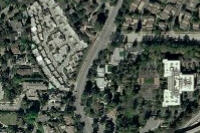

In [17]:
imagery

In [18]:
lyr = MapImageLayer.fromitem(imagery)

In [28]:
import random
folder = '/home/ubuntu/brick_kilns/images/'
tilemapping = {}

for index, row in df[:600].iterrows():
    imgid = row['index']
    print(imgid)
    g = row['SHAPE']
    print(g)

    for i in range(50): 
        xmid = row['X'] + random.randint(-150, 150)
        ymid = row['Y'] + random.randint(-150, 150)

        xmin, ymin = xmid - 360, ymid - 360
        xmax, ymax = xmid + 360, ymid + 360
#         xmid = row['X'] + random.randint(-20, 20)*0.1
#         ymid = row['Y'] + random.randint(-20, 20)*0.1

#         xmin, ymin = xmid - 6, ymid - 6
#         xmax, ymax = xmid + 6, ymid + 6

        ext = {'xmin':xmin, 'ymin':ymin, 'xmax':xmax, 'ymax':ymax}
#print(ext)
        filename = str(imgid).zfill(4) + '_' + str(i).zfill(2) + '.jpg'
        try:
            lyr.export_map(ext, 102100, size='224,224', f='image', format='jpg',
            save_folder=folder, save_file=filename)
        except Exception as e:
            print(f'Error getting {imgid} , {e} ')
        centers = []
        for index1, row1 in df.loc[(df.X > xmin) & (df.X < xmax) & (df.Y > ymin) & (df.Y < ymax)].iterrows():
            x, y = row1['X'], row1['Y']
            x = (x - xmin) / (xmax - xmin)
            y = (y - ymin) / (ymax - ymin)
            #print(x, y)
            centers.append((x,y))

        if len(centers) > 0:
            tilemapping[filename] = centers




0
{'x': 8596883.3356, 'y': 3376376.8834000006}
1
{'x': 8596583.523200002, 'y': 3375851.616700001}
2
{'x': 8596772.727699999, 'y': 3375470.010300003}
3
{'x': 8596739.2665, 'y': 3375121.4560000002}
4
{'x': 8596546.864599999, 'y': 3374705.9793}
5
{'x': 8597122.471700002, 'y': 3374312.6986000016}
6
{'x': 8597628.107700001, 'y': 3374328.165100001}
7
{'x': 8597880.6655, 'y': 3374957.867899999}
8
{'x': 8597911.3383, 'y': 3374830.5293999985}
9
{'x': 8598551.748599999, 'y': 3374763.607000001}
10
{'x': 8598554.908799998, 'y': 3375353.119099997}
11
{'x': 8598587.068799999, 'y': 3375583.4065999985}
12
{'x': 8598678.1576, 'y': 3374257.041500002}
13
{'x': 8598701.3946, 'y': 3374050.697300002}
14
{'x': 8598938.4115, 'y': 3374071.1459000036}
15
{'x': 8598905.879700001, 'y': 3373958.6789999977}
16
{'x': 8598230.1492, 'y': 3374030.248800002}
17
{'x': 8597873.2297, 'y': 3373067.309600003}
18
{'x': 8597763.5513, 'y': 3372948.3364000022}
19
{'x': 8598682.340300001, 'y': 3373398.0876}
20
{'x': 8599166.43100

176
{'x': 8595060.6292, 'y': 3393221.1811999977}
177
{'x': 8596067.253899999, 'y': 3392500.835699998}
178
{'x': 8596003.1199, 'y': 3392237.793399997}
179
{'x': 8598081.084199999, 'y': 3390134.5009000003}
180
{'x': 8598338.142900001, 'y': 3389626.192599997}
181
{'x': 8598566.155499998, 'y': 3389671.2141999975}
182
{'x': 8598695.4111, 'y': 3389024.936499998}
183
{'x': 8596989.296100002, 'y': 3389471.6669000015}
184
{'x': 8594651.1833, 'y': 3387048.706600003}
185
{'x': 8595420.4534, 'y': 3387305.129900001}
186
{'x': 8595726.799899999, 'y': 3387366.3992}
187
{'x': 8595304.7225, 'y': 3388001.784599997}
188
{'x': 8597577.132800002, 'y': 3387014.940399997}
189
{'x': 8596294.4183, 'y': 3384191.0420999974}
190
{'x': 8590954.6021, 'y': 3409653.538999997}
191
{'x': 8591237.8024, 'y': 3409790.0561000034}
192
{'x': 8594595.541700002, 'y': 3408844.6027000025}
193
{'x': 8595359.4564, 'y': 3408130.066399999}
194
{'x': 8596309.29, 'y': 3416992.543899998}
195
{'x': 8598331.462299999, 'y': 3416374.478200

350
{'x': 8604998.4338, 'y': 3349967.9804000035}
351
{'x': 8605325.657200001, 'y': 3351732.6269999966}
352
{'x': 8606065.427299999, 'y': 3351918.7041999996}
353
{'x': 8606151.6582, 'y': 3351637.3192000017}
354
{'x': 8606555.5817, 'y': 3351492.088299997}
355
{'x': 8610265.7784, 'y': 3349442.9705}
356
{'x': 8610376.970800001, 'y': 3349590.470700003}
357
{'x': 8609830.085499998, 'y': 3349345.3935000002}
358
{'x': 8609832.3548, 'y': 3349622.240000002}
359
{'x': 8610860.317499999, 'y': 3350198.6252999976}
360
{'x': 8610812.663600001, 'y': 3350080.6251000017}
361
{'x': 8609998.735, 'y': 3350795.7967000008}
362
{'x': 8610390.8585, 'y': 3350922.1476000026}
363
{'x': 8613243.012600001, 'y': 3352842.282200001}
364
{'x': 8612966.1661, 'y': 3353504.8982999995}
365
{'x': 8612938.9353, 'y': 3352594.9356999993}
366
{'x': 8612646.295000002, 'y': 3353755.6032000035}
367
{'x': 8612909.162999999, 'y': 3342276.549900003}
368
{'x': 8612051.487100001, 'y': 3341194.579400003}
369
{'x': 8612059.9357, 'y': 334

535
{'x': 8539630.795400001, 'y': 3332224.4510999992}
536
{'x': 8539372.285799999, 'y': 3332130.4475999996}
549
{'x': 8540748.497000001, 'y': 3333858.7019999996}
550
{'x': 8540769.1778, 'y': 3334057.989500001}
551
{'x': 8540752.257199999, 'y': 3334770.5359999985}
552
{'x': 8538297.637699999, 'y': 3335776.1479}
553
{'x': 8536851.1118, 'y': 3336236.990699999}
554
{'x': 8536862.3922, 'y': 3336471.9993999973}
555
{'x': 8536173.228999998, 'y': 3336904.063000001}
556
{'x': 8536596.244800001, 'y': 3337221.3249000013}
557
{'x': 8537177.8915, 'y': 3337097.945299998}
558
{'x': 8536615.501400001, 'y': 3338096.0040000007}
559
{'x': 8537158.1648, 'y': 3338535.1882999986}
560
{'x': 8536759.8908, 'y': 3339247.509300001}
561
{'x': 8537037.840300001, 'y': 3339128.3879999965}
562
{'x': 8543784.810199998, 'y': 3339132.298600003}
563
{'x': 8543004.581099998, 'y': 3336908.1757000014}
564
{'x': 8541524.965999998, 'y': 3330888.1912999973}
565
{'x': 8542038.2251, 'y': 3330833.6692999974}
566
{'x': 8542260.073

In [29]:
import pickle

pickle.dump(tilemapping, open('/home/ubuntu/brick_kilns/TILEMAPPING1.pkl', 'wb'))

In [20]:

from pathlib import Path
PATH = Path('/home/ubuntu/courses_from_geonuma/courses/dl2/solarpanel')

# tilemapping is a dictionary which contains mapping from image to bounding boxes
tilemapping1 = pickle.load(open(PATH/'TILEMAPPING1.pkl', 'rb'))

In [21]:
len(tilemapping1)

10934

In [33]:
tilemapping1['0249_03.jpg']

[(0.475, 0.5375)]

In [32]:
for i in range(250):
    for j in range(50):
        filename = str(i).zfill(4) + '_' + str(j).zfill(2) + '.jpg'
        if filename not in tilemapping1:
            print(filename)
        

0000_02.jpg
0000_09.jpg
0000_11.jpg
0000_12.jpg
0000_32.jpg
0000_34.jpg
0000_47.jpg
0001_01.jpg
0001_10.jpg
0001_13.jpg
0001_17.jpg
0001_27.jpg
0001_37.jpg
0001_38.jpg
0001_48.jpg
0002_05.jpg
0002_07.jpg
0002_14.jpg
0002_20.jpg
0002_21.jpg
0002_27.jpg
0002_36.jpg
0002_38.jpg
0002_42.jpg
0003_10.jpg
0003_13.jpg
0003_16.jpg
0003_17.jpg
0003_24.jpg
0003_41.jpg
0003_43.jpg
0004_09.jpg
0004_10.jpg
0004_14.jpg
0004_29.jpg
0005_12.jpg
0005_23.jpg
0007_00.jpg
0007_14.jpg
0007_23.jpg
0007_31.jpg
0007_34.jpg
0008_00.jpg
0008_05.jpg
0008_32.jpg
0009_05.jpg
0009_07.jpg
0009_22.jpg
0009_24.jpg
0009_28.jpg
0009_31.jpg
0009_33.jpg
0009_35.jpg
0009_46.jpg
0010_03.jpg
0010_19.jpg
0011_05.jpg
0011_17.jpg
0011_20.jpg
0012_09.jpg
0012_33.jpg
0012_41.jpg
0012_49.jpg
0013_23.jpg
0014_01.jpg
0014_02.jpg
0014_12.jpg
0014_14.jpg
0014_32.jpg
0015_25.jpg
0015_27.jpg
0015_34.jpg
0015_41.jpg
0016_05.jpg
0016_12.jpg
0016_47.jpg
0016_49.jpg
0017_17.jpg
0017_18.jpg
0017_21.jpg
0017_27.jpg
0017_29.jpg
0017_31.jpg
0017

0180_28.jpg
0180_29.jpg
0180_35.jpg
0180_42.jpg
0181_02.jpg
0181_09.jpg
0181_12.jpg
0181_18.jpg
0181_20.jpg
0181_21.jpg
0181_23.jpg
0181_33.jpg
0181_35.jpg
0181_37.jpg
0181_39.jpg
0181_42.jpg
0181_46.jpg
0182_03.jpg
0182_04.jpg
0182_20.jpg
0182_21.jpg
0182_43.jpg
0182_45.jpg
0183_32.jpg
0183_43.jpg
0183_44.jpg
0184_30.jpg
0184_35.jpg
0185_07.jpg
0185_12.jpg
0185_13.jpg
0185_24.jpg
0185_30.jpg
0185_31.jpg
0185_35.jpg
0186_03.jpg
0186_04.jpg
0186_06.jpg
0186_08.jpg
0186_09.jpg
0186_13.jpg
0186_22.jpg
0186_23.jpg
0186_28.jpg
0186_34.jpg
0186_48.jpg
0187_00.jpg
0187_02.jpg
0187_04.jpg
0187_06.jpg
0187_23.jpg
0187_36.jpg
0187_48.jpg
0187_49.jpg
0188_12.jpg
0188_18.jpg
0188_21.jpg
0188_23.jpg
0188_30.jpg
0188_37.jpg
0188_40.jpg
0188_42.jpg
0188_48.jpg
0189_04.jpg
0189_14.jpg
0189_20.jpg
0189_24.jpg
0189_30.jpg
0189_32.jpg
0189_33.jpg
0189_35.jpg
0189_38.jpg
0189_45.jpg
0189_47.jpg
0190_34.jpg
0190_35.jpg
0190_39.jpg
0190_40.jpg
0190_42.jpg
0190_48.jpg
0191_01.jpg
0191_02.jpg
0191_03.jpg
0191